Merge Data for Deeper Insights

✅ Pipeline + Accounts
- Do larger companies (high revenue/employees) close more deals?
- Which industries perform best?
- Action: Compare win rates by company size & industry.

DIVE INTO QUADRIC OR CUBIC FUNCTIONS FOR UNDERSTANDING BETTER CURVED OR COMPLEX RELATIONSHIPS?

	•	Quadratic = Simple curved relationships (one peak or valley).
	•	Cubic = More complex evolution (multiple peaks, valleys, and inflection points).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_path = '/Users/sayo/personal_projects/sales-ops-auto/data'

In [4]:
sales_pipeline = pd.read_csv(os.path.join(data_path, 'sales_pipeline.csv'))
accounts = pd.read_csv(os.path.join(data_path, 'accounts.csv'))

In [5]:
sales_pipeline.head(15)

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0
5,ZNBS69V1,Anna Snelling,MG Special,Ron-tech,Won,2016-10-29,2017-03-01,49.0
6,9ME3374G,Vicki Laflamme,MG Special,J-Texon,Won,2016-10-30,2017-03-02,57.0
7,7GN8Q4LL,Markita Hansen,GTX Basic,Cheers,Won,2016-11-01,2017-03-07,601.0
8,OLK9LKZB,Niesha Huffines,GTX Plus Basic,Zumgoity,Won,2016-11-01,2017-03-03,1026.0
9,HAXMC4IX,James Ascencio,MG Advanced,NaN,Engaging,2016-11-03,NaN,NaN


In [6]:
accounts.head()

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN
1,Betasoloin,medical,1999,251.41,495,United States,NaN
2,Betatech,medical,1986,647.18,1185,Kenya,NaN
3,Bioholding,medical,2012,587.34,1356,Philipines,NaN
4,Bioplex,medical,1991,326.82,1016,United States,NaN


In [27]:
accounts.drop(columns=['subsidiary_of'], inplace=True)

In [45]:
sales_pipeline.drop(columns=['opportunity_id', 'product'], inplace=True)

dropped some columns since they wont be useful now (like product in the next analisys) or useless (opp id or subsidiary)

Merging both tables from left on account & exploring basic info

In [46]:
merged_tables = pd.merge(sales_pipeline, accounts, how='left', on='account')

In [47]:
merged_tables.head(15)

,sales_agent,account,deal_stage,engage_date,close_date,close_value,sector,year_established,revenue,employees,office_location
0,Moses Frase,Cancity,Won,2016-10-20,2017-03-01,1054.0,retail,2001.0,718.62,2448.0,United States
1,Darcel Schlecht,Isdom,Won,2016-10-25,2017-03-11,4514.0,medical,2002.0,3178.24,4540.0,United States
2,Darcel Schlecht,Cancity,Won,2016-10-25,2017-03-07,50.0,retail,2001.0,718.62,2448.0,United States
3,Moses Frase,Codehow,Won,2016-10-25,2017-03-09,588.0,software,1998.0,2714.90,2641.0,United States
4,Zane Levy,Hatfan,Won,2016-10-25,2017-03-02,517.0,services,1982.0,792.46,1299.0,United States
5,Anna Snelling,Ron-tech,Won,2016-10-29,2017-03-01,49.0,medical,1992.0,3922.42,6837.0,United States
6,Vicki Laflamme,J-Texon,Won,2016-10-30,2017-03-02,57.0,retail,1989.0,1388.67,3583.0,United States
7,Markita Hansen,Cheers,Won,2016-11-01,2017-03-07,601.0,entertainment,1993.0,4269.90,6472.0,United States
8,Niesha Huffines,Zumgoity,Won,2016-11-01,2017-03-03,1026.0,medical,1984.0,441.08,1210.0,United States
9,James Ascencio,NaN,Engaging,2016-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
merged_tables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sales_agent       8800 non-null   object 
 1   account           7375 non-null   object 
 2   deal_stage        8800 non-null   object 
 3   engage_date       8300 non-null   object 
 4   close_date        6711 non-null   object 
 5   close_value       6711 non-null   float64
 6   sector            7375 non-null   object 
 7   year_established  7375 non-null   float64
 8   revenue           7375 non-null   float64
 9   employees         7375 non-null   float64
 10  office_location   7375 non-null   object 
dtypes: float64(4), object(7)
memory usage: 756.4+ KB


In [49]:
merged_tables['close_value'].value_counts()

close_value
0.0       2473
54.0        80
53.0        57
57.0        55
59.0        54
          ... 
5695.0       1
1216.0       1
4712.0       1
3908.0       1
1052.0       1
Name: count, Length: 2051, dtype: int64

In [50]:
merged_tables.describe()

,close_value,year_established,revenue,employees
count,6711.000000,7375.000000,7375.000000,7375.000000
mean,1490.915512,1995.483661,2467.515536,5701.213424
std,2320.670773,9.187126,2596.135671,6816.683924
min,0.000000,1979.000000,4.540000,9.000000
25%,0.000000,1988.000000,647.180000,1238.000000
50%,472.000000,1995.000000,1698.200000,3492.000000
75%,3225.000000,2002.000000,2952.730000,7523.000000
max,30288.000000,2017.000000,11698.030000,34288.000000


In [51]:
#checking for missing values
merged_tables.isnull().sum()

sales_agent            0
account             1425
deal_stage             0
engage_date          500
close_date          2089
close_value         2089
sector              1425
year_established    1425
revenue             1425
employees           1425
office_location     1425
dtype: int64

Remark: out of 8k entries we have a significant amount of close value missing and this is approx 23% of the total close value which is rather strange, it maybe mean they are still in a early stage

In [52]:
missing_close_value = merged_tables[merged_tables['close_value'].isna()]
display(missing_close_value)

,sales_agent,account,deal_stage,engage_date,close_date,close_value,sector,year_established,revenue,employees,office_location
9,James Ascencio,NaN,Engaging,2016-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,Maureen Marcano,Ganjaflex,Engaging,2016-11-10,NaN,NaN,retail,1995.0,5158.71,17479.0,Japan
42,Kami Bicknell,NaN,Engaging,2016-11-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,Cassey Cress,NaN,Engaging,2016-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,Kami Bicknell,NaN,Engaging,2016-11-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8795,Versie Hillebrand,NaN,Prospecting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8796,Versie Hillebrand,NaN,Prospecting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8797,Versie Hillebrand,NaN,Prospecting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8798,Versie Hillebrand,NaN,Prospecting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remark: All the missing values in close value are due to a early stage in the deal cycle call "engaging" but not all of them

In [53]:
merged_tables['close_value'].fillna(0, inplace=True)


Filled in all missing values with 0 for close value

In [54]:
zero_close_value = merged_tables[merged_tables['close_value'] == 0]
display(zero_close_value)

,sales_agent,account,deal_stage,engage_date,close_date,close_value,sector,year_established,revenue,employees,office_location
9,James Ascencio,NaN,Engaging,2016-11-03,NaN,0.0,NaN,NaN,NaN,NaN,NaN
11,Gladys Colclough,Genco Pura Olive Oil Company,Lost,2016-11-04,2017-03-18,0.0,retail,2007.0,894.33,1635.0,Italy
15,Rosalina Dieter,Sonron,Lost,2016-11-05,2017-03-03,0.0,telecommunications,1999.0,1699.85,5108.0,United States
18,Daniell Hammack,Xx-zobam,Lost,2016-11-07,2017-03-09,0.0,entertainment,1989.0,3838.39,8274.0,United States
20,James Ascencio,Fasehatice,Lost,2016-11-07,2017-03-17,0.0,retail,1990.0,4968.91,7523.0,United States
...,...,...,...,...,...,...,...,...,...,...,...
8795,Versie Hillebrand,NaN,Prospecting,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
8796,Versie Hillebrand,NaN,Prospecting,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
8797,Versie Hillebrand,NaN,Prospecting,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
8798,Versie Hillebrand,NaN,Prospecting,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [55]:
merged_tables.isnull().sum()

sales_agent            0
account             1425
deal_stage             0
engage_date          500
close_date          2089
close_value            0
sector              1425
year_established    1425
revenue             1425
employees           1425
office_location     1425
dtype: int64

In [56]:
merged_tables['close_value'].describe()

count     8800.000000
mean      1136.992500
std       2123.528615
min          0.000000
25%          0.000000
50%          0.000000
75%       1085.250000
max      30288.000000
Name: close_value, dtype: float64

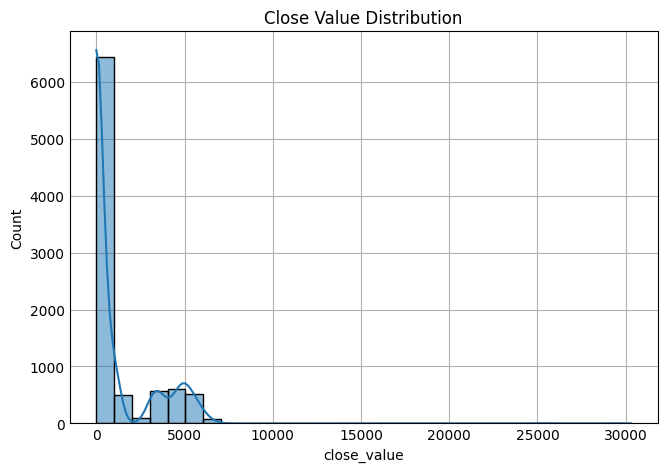

In [57]:
#Helps to see if sales are normally distributed or skewed

plt.figure(figsize=(6,4))
sns.histplot(merged_tables['close_value'], bins=30, kde=True)
plt.title('Close Value Distribution')
plt.show()

Histogram above shows a right-skewed (positively skewed) distribution of close values.

Takeways:
	
	1.	Majority of sales are small – There’s a high concentration of lower values close to zero.

	2.	A long right tail – A few sales are significantly higher, pulling the mean upwards.

	3.	Potential outliers – Some very large sales exist (above 10k), but they are rare.

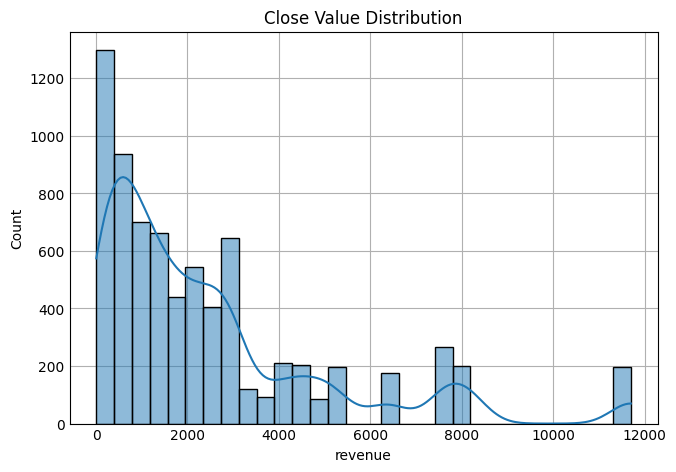

In [58]:
#Helps to see if sales are normally distributed or skewed

plt.figure(figsize=(6,4))
sns.histplot(merged_tables['revenue'], bins=30, kde=True)
plt.title('Close Value Distribution')
plt.show()

In [59]:
correlation = merged_tables['revenue'].corr(merged_tables['close_value'])
print(f"Correlation coefficient: {correlation}")

Correlation coefficient: 0.03889260060431617


Very close to 0. This means there is almost no linear correlation between revenue and closed value

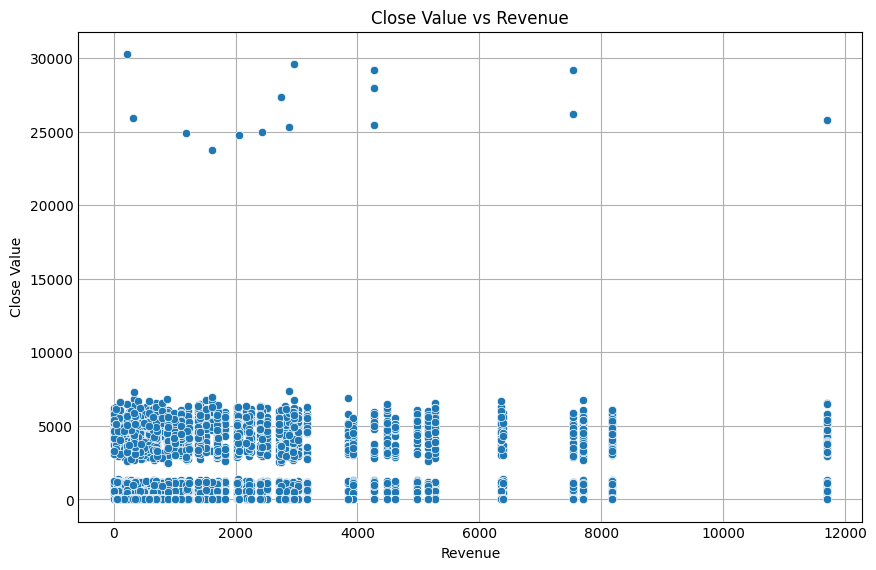

In [61]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=merged_tables['revenue'], y=merged_tables['close_value'])
plt.title("Close Value vs Revenue")
plt.xlabel("Revenue")
plt.ylabel("Close Value")
plt.show()

above: we can see that companies between 0-10k are the ones that are most likely to have close values 

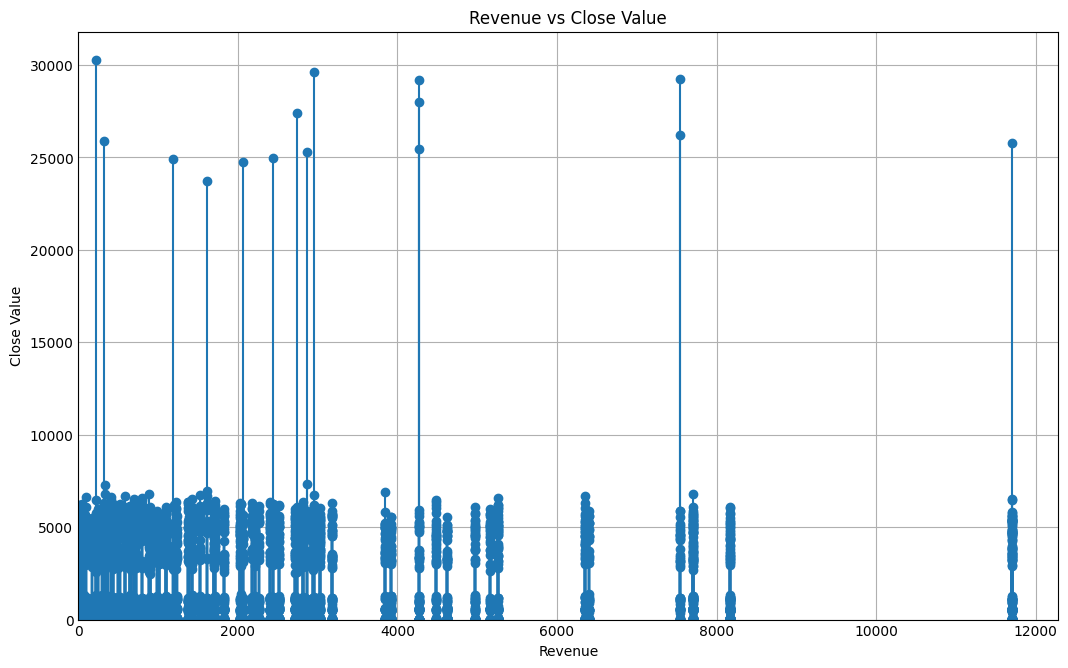

In [62]:
# Assuming 'merged_tables' is a DataFrame and it has 'num_employees' and 'close_value' columns
plt.style.use('_mpl-gallery')

# Extract data
x = merged_tables['revenue']
y = merged_tables['close_value']

# Create stem plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.stem(x, y, basefmt=" ")

ax.set_title('Revenue vs Close Value')
ax.set_xlabel('Revenue')
ax.set_ylabel('Close Value')
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.grid(True)

plt.show()

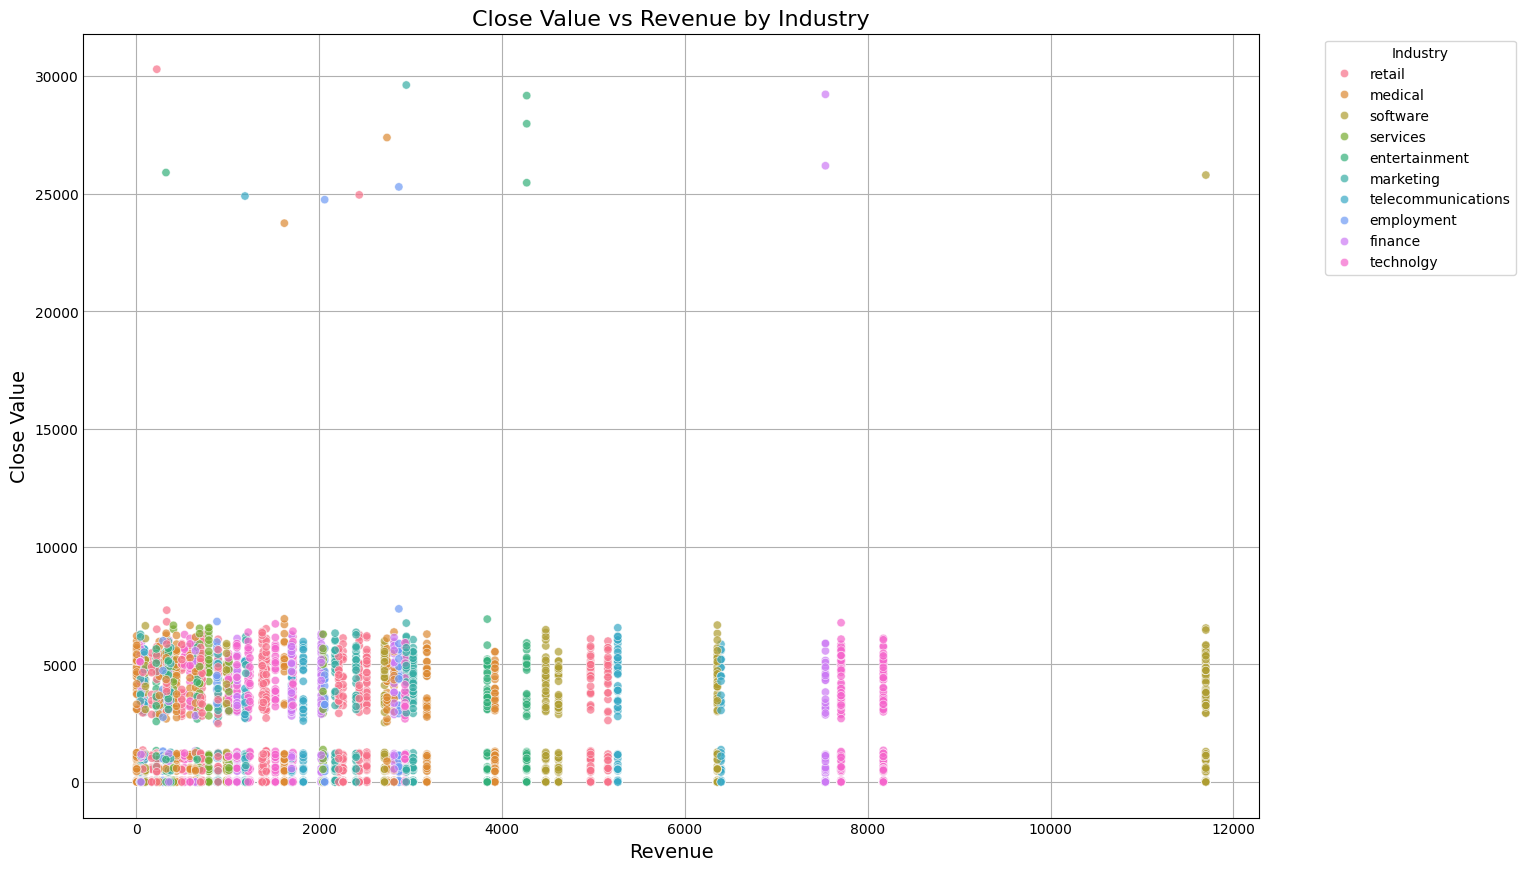

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12, 8))  # Adjust size as needed

# Create scatter plot
sns.scatterplot(x=merged_tables['revenue'], y=merged_tables['close_value'], hue=merged_tables['sector'], alpha=0.7)

# Add labels and title
plt.xlabel("Revenue", fontsize=14)
plt.ylabel("Close Value", fontsize=14)
plt.title("Close Value vs Revenue by Industry", fontsize=16)

# Improve legend visibility
plt.legend(title="Industry", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()